# Assignment 1
    Paul Kauffman

## Background:
    In this scenerio I work for a local sports marketing firm that wants to know what was tweeted about during the first weekend of college football on September 1st. One of the executives requested that the three closest local schools be the    area of focus; 
    K-State, KU, and Nebraska. 

# Connecting to Twitter 
  

In [1]:
import pandas as pd
import tweepy
from tweepy import OAuthHandler

#API keys generated from app
consumer_key =  '9pYLWvGny3KDq249QI7z9lM2Q'
consumer_secret = 'kXUcPjmBzDiIA7J6XjlM9CeSalpTvL8qr0fQptFInwfRRsBCqH'
access_token= '3882545175-CO7kqAl1H9IzJu0USlDxVdVRnHxRfLspTAKuJEj'
access_secret= 'siApPytjdl9ibOwB8PDzJPbZwf9RcaloIkYsV8RybdpLQ'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

### Check Connection with timeline 

In [2]:
timeline_tweets = api.home_timeline()
for tweet in timeline_tweets: print(tweet.text)

Even in the cold, Tyreek shows off the legs! https://t.co/CCLsSmYZOH
RT @calvinwatkins: Had an interesting talk with Amari Cooper today. He said Raiders owner Mark Davis wanted to make the trade and not Jon G…
Apple coming to Austin, plus more of the biggest hiring announcements of the year: https://t.co/i0QHa2cJKV
Everything's going great with the Skins, why do you ask? https://t.co/HSvifYGd68 https://t.co/4pJGn9iKVd
Columbine High School, site of a 1999 massacre by two students, was shut down after receiving bomb threats, the Jef… https://t.co/7N2QHqV8oW
RT @geoffschwartz: “Kansas City doesn’t have a tackle that can block him (Bosa) 1 on 1” ... Mad disrespectful to Mitch and Fisher... Bosa i…
Tune in to the Arrowhead Pride Tailgate driven by Albright Buick GMC Cadillac right now!

https://t.co/pWK7oILlWW https://t.co/p54m5oebdp
Our @Riley_Gates delivers three thoughts from Thursday's media session with the #KState basketball team.

https://t.co/UaRhrv1Ws4
Olathe West students "Give A

# --T1--

## First API search 

#### ~500 tweets including the hashtag (#) "college football"

In [3]:
results = []

#searching for 500 tweets including the phrase "college football"
for tweet in tweepy.Cursor(api.search, q='#collegefootball').items(500):
    results.append(tweet)

# Verify the number of items returned
print(len(results))

395


### Name columns and create dataframe

In [4]:
def toDataFrame(tweets):

    DataSet = pd.DataFrame()

    DataSet['tweetText'] = [tweet.text for tweet in tweets]
    DataSet['tweetSource'] = [tweet.source for tweet in tweets]
    DataSet['tweetCreated'] = [tweet.created_at for tweet in tweets]
    DataSet['userFollowerCt'] = [tweet.user.followers_count for tweet in tweets]
    DataSet['userLocation'] = [tweet.user.location for tweet in tweets]

    return DataSet

tweet_frame = toDataFrame(results)
print(tweet_frame.shape)

(395, 5)


##### 500 tweets and 5 column dataframe created

### View Tweets

In [5]:
#set column with to view tweetText
pd.set_option('display.max_colwidth', 200)

tweet_frame.head(5)

,tweetText,tweetSource,tweetCreated,userFollowerCt,userLocation
0,All of these picks come from the greatest #betting angle I have ever found. Follow and DM to learn about the system… https://t.co/drKEvTLPQ9,Twitter for Android,2018-12-14 00:10:03,101,"Memphis, TN"
1,#sportsbetting #SportsPicks #sports #winning #winner #parlay #FREEPICKS #entrepreneur #Vegas #dfs #FanDuel… https://t.co/J0I2EJF3ZP,Twitter for Android,2018-12-14 00:06:56,1056,"New Jersey, USA"
2,"Who does @msschneid, @domandthunder, @SeanPlichta &amp; I think will win some of the bigger non-NY6 Bowl games? Listen… https://t.co/voK9QdnIpb",Twitter Web Client,2018-12-14 00:05:21,2028,"Austin, TX"
3,🏀 #NCAAB\n\nFiu -3\nMilwaukee/UMKC O141\n\n#sportsbetting #sportsbet #sportsbook #vegas #collegefootball #ncaaf #nfl… https://t.co/9l4xEoiSrW,TweetCaster for Android,2018-12-13 23:59:22,40,Las Vegas
4,StreetSmartFootball has the #CollegeFootball locks for you this weekend:\n#NewOrleansBowl https://t.co/UOBWgAoGC0… https://t.co/bvApFfMsRQ,Twitter Web Client,2018-12-13 23:55:42,1562,New York


### First API Search Analysis:
    While the search was succesful at pulling in 500 tweets with "#collegefootball" the information was not specific to the local schools, and was not specific to the first weekend of college football. The data also included a number of retweets and unrealted information. 

# Second API Search 
    focus on local teams and change search to tweets containing the phrase 'college football'

### Adding geo tagging to tweepy. Lat/Long for Manhattan, KS with 200km radius search area

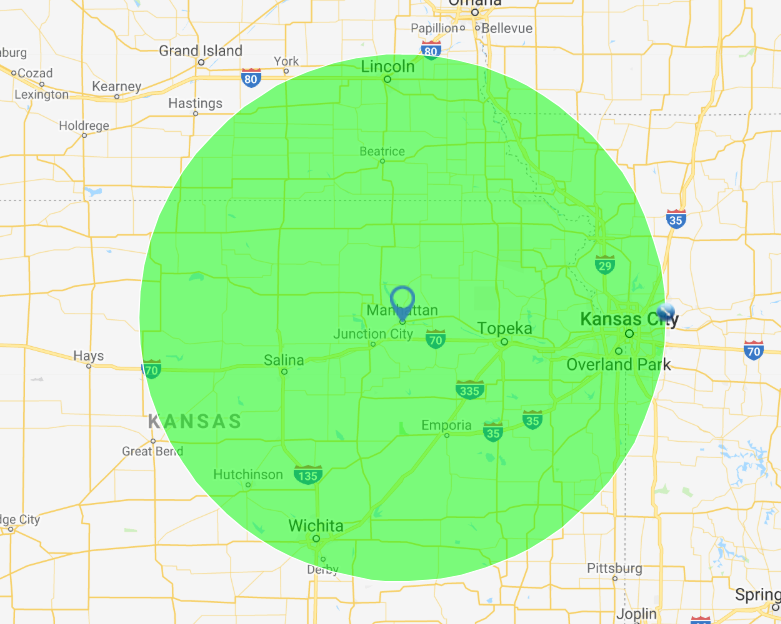Desktop\Rockhurst\BIA 6304-Text Mining\Homework 1\ManhattanRadius.png)

In [50]:
results = []

for tweet in tweepy.Cursor(api.search, q='college football', geocode= '39.183609,-96.571671,200km').items(500):
    results.append(tweet)

print(len(results))



Excel file ready
500


In [508]:
def toDataFrame(tweets):

    DataSet = pd.DataFrame()

    DataSet['tweetText'] = [tweet.text for tweet in tweets]
    DataSet['tweetSource'] = [tweet.source for tweet in tweets]
    DataSet['tweetCreated'] = [tweet.created_at for tweet in tweets]
    DataSet['userFollowerCt'] = [tweet.user.followers_count for tweet in tweets]
    DataSet['userLocation'] = [tweet.user.location for tweet in tweets]

    return DataSet

tweet_frame = toDataFrame(results)
tweet_frame.head()

,tweetText,tweetSource,tweetCreated,userFollowerCt,userLocation
0,"RT @UMKCFootball: ""UMKC Football was the most entertaining aspect of college football on opening weekend. … They're 2-0, they played a day-…",Twitter for iPhone,2018-09-05 03:13:54,216,"Beaverton, OR"
1,@kfhradio can we please just add an extra hour of @JLutz82 and @boblutz on Tuesdays during college football season?… https://t.co/LdEPFhn4jS,Twitter for Android,2018-09-05 03:06:56,218,ICT
2,"RT @TTC_ESU: Faculty, staff, and students of The Teachers College @emporiastate are invited to enjoy free food and stay for the football ga…",Twitter for iPhone,2018-09-05 03:06:05,1014,"Emporia, KS"
3,3-34 is definitely an ongoing evaluation. https://t.co/sgUC2pcVSe,Twitter for iPhone,2018-09-05 02:52:31,76,"Kansas City, MO"
4,RT @jessenewell: Story on Jeff Long's football statement. Worth noting this came in response to requests from multiple reporters seeking co…,Twitter for iPhone,2018-09-05 02:43:39,63,Southeast Kansas.


### Second API Search Analysis:
    With the geotagging restriction in place the search did pull more tweets within the area desired. The search parameter of tweetings containing the phrases "college football" also seemed to pull tweets from people rather than networks and companies. The search still needs to be pared down to the first college football weekend and retweets also could skew the results if a popular tweet is included. 

# Third (and final) API Search
    removing retweets and searching only on 9/1 (first college gameday of the season)

In [509]:
results = []

#filter:retweets removes tweets containing "RT"
for tweet in tweepy.Cursor(api.search, q='college football-filter:retweets',  geocode= '39.183609,-96.571671,200km',
                          start = '2018-09-01' , until ='2018-09-02').items(500):
    results.append(tweet)

# Verify the number of items returned
print(type(results))
print(len(results))

<class 'list'>
500


In [511]:
def toDataFrame(tweets):

    DataSet = pd.DataFrame()

    DataSet['tweetText'] = [tweet.text for tweet in tweets]
    DataSet['tweetSource'] = [tweet.source for tweet in tweets]
    DataSet['tweetCreated'] = [tweet.created_at for tweet in tweets]
    DataSet['userFollowerCt'] = [tweet.user.followers_count for tweet in tweets]
    DataSet['userLocation'] = [tweet.user.location for tweet in tweets]

    return DataSet

tweet_frame = toDataFrame(results)
tweet_frame.head(10)

,tweetText,tweetSource,tweetCreated,userFollowerCt,userLocation
0,"Lets go #Nebraska @Huskers! NEB vs. AKRON at Memorial Stadium (Lincoln, NE) has started https://t.co/0ZWSSfDGIU",IFTTT,2018-09-01 23:57:03,11285,"Lincoln, NE"
1,What kind of moron says this during the first weekend of college football? https://t.co/PsqrOJPjUe,Twitter for iPhone,2018-09-01 23:50:03,303,"Lincoln, NE"
2,Ready to watch the winningest football program in college history! #GOBLUE 〽️,Twitter for iPhone,2018-09-01 23:46:29,734,"Topeka,Kansas"
3,I just want to know how a multi-billion dollar company isn’t prepared for people wanting to stream their college fo… https://t.co/yZejFfWBqZ,Twitter for iPhone,2018-09-01 23:45:10,185,"Olathe, KS"
4,College football is BACK! LET’S GO BLUE!!!! #GoBlue 〽️,Twitter for iPhone,2018-09-01 23:43:21,239,"Kansas City, MO"
5,"@DScottFritchen Not mad at KSU, upset at ESPN because they weren’t prepared for opening day college football... it’… https://t.co/eWWU9KDVMg",Twitter for iPhone,2018-09-01 23:42:52,764,"Wichita, KS"
6,"Follow live: No. 14 Michigan, No. 12 Notre Dame renew rivalry https://t.co/xxBQ8Y65cJ",IFTTT,2018-09-01 23:41:24,4036,"Wichita, KS"
7,College football season reminds me of how god-fucking-awful Brian Kelly is.,Twitter for iPhone,2018-09-01 23:39:34,1235,"Kansas City, MO"
8,Got to experience the best new tradition in college football today live! https://t.co/e8HS4uhDKd,Twitter for iPhone,2018-09-01 23:32:45,546,"Kansas City, MO"
9,Steven Sims is a legitimately excellent college WR with a shot at sticking on an NFL roster. It's a shame he's bee… https://t.co/RHTdMZeBFS,TweetDeck,2018-09-01 23:32:43,2177,Kansas City


### Third(and final) API Search Analysis:
    This search finally meets the qualifications needed. The area is restricted to the local area reqested and should not be skewed by retweeted tweets. The timeline is also restricted to the day of the games so that the information is relevant to that timeframe. 

# --T2--

# Vectorizers 

#### Basic Vectorizer (binary = True)

In [529]:
from sklearn.feature_extraction.text import CountVectorizer
import math

cv1 = CountVectorizer(binary=True)
cv1_chat = cv1.fit_transform(tweet_frame['tweetText'])

print(cv1_chat.shape)

# features 
cv1_features= cv1.get_feature_names()
cv1_features[:10]

(500, 2026)


['00',
 '01zad06wra',
 '05',
 '0jleumla6z',
 '0zwssfdgiu',
 '10',
 '100',
 '11',
 '11pm',
 '12']

#### Vectorizer #2 (binary=False, using ngrams)
    To help include common words used together like 'College Football' I use ngrams to show those common 2 word tokens

In [535]:
cv2 = CountVectorizer(binary=False, ngram_range= (1,2)) 
cv2_chat = cv2.fit_transform(tweet_frame['tweetText'])

print(cv2_chat.shape)

cv2_features= cv2.get_feature_names()
cv2_features[:10]

(500, 7029)


['00',
 '00 and',
 '00 game',
 '01zad06wra',
 '05',
 '05 and',
 '05 left',
 '0jleumla6z',
 '0zwssfdgiu',
 '10']

#### Vectorizer #3 (binary=True, stop_words)
    With vectorizer #2 having over 7000 columns the word count needs to be pared down. Stop words will help get rid of the filler words that have little value in this case

In [537]:
cv3 = CountVectorizer(binary=True, stop_words='english')
cv3_chat = cv3.fit_transform(tweet_frame['tweetText']) 


print(cv3_chat.shape)

cv3_features= cv3.get_feature_names()
cv3_features[:10]

(500, 1840)


['00',
 '01zad06wra',
 '05',
 '0jleumla6z',
 '0zwssfdgiu',
 '10',
 '100',
 '11',
 '11pm',
 '12']

#### Vectorizer #4 (added ngrams back and min_df)
    to further reduce the number of tokens I added a min-df parameter. This will show the tokens that are in at least 10% of the corpus 

In [542]:
cv4 = CountVectorizer(binary=True, stop_words='english', ngram_range=(1,2), min_df=.1)
cv4_chat = cv4.fit_transform(tweet_frame['tweetText']) 


print(cv4_chat.shape)

cv4_features= cv4.get_feature_names()
cv4_features[:10]

(500, 5)


['college', 'college football', 'football', 'https', 'season']

#### Vectorizer #5 (added max_df)
    the min_df set to .1 removed too many tokens (only 5 were left). Adding max_df at .01 will only show the tokens included in less than 1% of the corpus

In [548]:
cv5 = CountVectorizer(binary=True, max_df= .01, stop_words='english',ngram_range = (1,2))


cv5_chat = cv5.fit_transform(tweet_frame['tweetText'])

print(cv5_chat.shape)

cv5_features= cv5.get_feature_names()
cv5_features[:10]


(500, 4986)


['00',
 '00 4th',
 '00 game',
 '01zad06wra',
 '05',
 '05 just',
 '05 left',
 '0jleumla6z',
 '0zwssfdgiu',
 '10 15']

#### Vectorizer #6
    This is the vectorizer of choice. This uses a combination of max-df, min-df, stop words, and ngram. 68 total features in the vector

In [549]:
    # try changing a few parameters
cv6 = CountVectorizer(binary=True, max_df =.15,min_df= .015, stop_words ='english',ngram_range = (1,2)) #define the transformation
# only asking it to make changes based on document frequency
# not using stop words, but it should still might help eliminate "is"

cv6_chat = cv6.fit_transform(tweet_frame['tweetText']) #apply the transformation

print(type(cv6_chat))
print(cv6_chat.shape)

<class 'scipy.sparse.csr.csr_matrix'>
(500, 68)


## Feature Count 

### Top 25 token count
    words like love, best, and happy are valuable words 

In [481]:
names = cv6.get_feature_names()   #create list of feature names
print(type(names), len(names))

count = np.sum(cv6_chat.toarray(), axis = 0) # convert list to array to add up feature counts 
count2 = count.tolist()  # convert numpy array to list

print("") #this is just to add a break in the output
print("We started with", len(names), "and we ended with",len(count2))
print("")

count_df = pd.DataFrame(count2, index = names, columns = ['count']) # create a dataframe from the list
sorted_count = count_df.sort_values(['count'], ascending = False)  #arrange by count instead
print(sorted_count.head(25))

<class 'list'> 68

We started with 68 and we ended with 68

                   count
season                61
day                   47
game                  46
saturday              45
football season       38
today                 34
watch                 29
year                  27
state                 26
love                  25
football saturday     22
time                  20
games                 20
football game         19
weekend               19
best                  18
don                   16
like                  16
just                  16
new                   16
watch college         16
football https        16
week                  16
start                 15
happy                 15


# Weights

In [572]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(use_idf=True, norm=None, stop_words ='english', max_df =.15,min_df= .015, ngram_range = (1,2))
tf_chat = tfidf.fit_transform(tweet_frame['tweetText'])


tf_chat_df =pd.DataFrame(tf_chat.toarray(),columns = tfidf.get_feature_names())
tf_chat_df.head(10)

,2018,amp,baby,best,big,come,day,day college,don,espn,...,tomorrow,tonight,ve,vs,watch,watch college,watching,week,weekend,year
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,4.651657,0.000000,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,4.220874,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,3.815409,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
5,0.0,0.0,0.0,0.000000,0.0,0.0,3.345405,4.508556,0.0,4.731699,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
6,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
7,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
8,0.0,0.0,0.0,4.272167,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
9,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0


## Sort Weights
    very similar list to the count list with more confusion of how weights are calculated 

In [573]:
names = tfidf.get_feature_names()   #create list of feature names
count = np.sum(tf_chat.toarray(), axis = 0) # add up feature counts 
count2 = count.tolist() 

count_df = pd.DataFrame(count2, index = names, columns = ['count']) # create a dataframe from the list
sorted_weights = count_df.sort_values('count', ascending = False)
print(sorted_weights.head(25))

                        count
season             188.457775
game               173.961065
day                170.615660
saturday           159.234341
football season    135.015689
today              124.482773
state              117.623077
watch              114.462262
year               104.878843
love                98.962739
football saturday   89.784461
football game       84.417477
weekend             84.417477
time                83.441673
games               83.441673
best                76.899008
week                74.517677
new                 74.517677
football https      70.134284
like                70.134284
just                70.134284
don                 70.134284
happy               66.660261
watch college       66.660261
start               66.660261


### Overall, I am happy with the results. The count option does give some context to the audience’s feelings on 9/1. The weights option, while accurate, causes confusion when trying to describe how it is calculated. The count options generates basically the same list with much more clarity.